Импортируем модули


In [22]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

Датасет


In [23]:
TRAIN_DIR = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/train'
TEST_DIR = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/test'

Загрузка датасета

In [24]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

Тренировочный фрейм

In [25]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

sad completed
happy completed
angry completed
neutral completed
surprised completed


In [26]:
print(train)

                                                  image      label
0     /content/drive/MyDrive/autistic_emotion_recogn...        sad
1     /content/drive/MyDrive/autistic_emotion_recogn...        sad
2     /content/drive/MyDrive/autistic_emotion_recogn...        sad
3     /content/drive/MyDrive/autistic_emotion_recogn...        sad
4     /content/drive/MyDrive/autistic_emotion_recogn...        sad
...                                                 ...        ...
1045  /content/drive/MyDrive/autistic_emotion_recogn...  surprised
1046  /content/drive/MyDrive/autistic_emotion_recogn...  surprised
1047  /content/drive/MyDrive/autistic_emotion_recogn...  surprised
1048  /content/drive/MyDrive/autistic_emotion_recogn...  surprised
1049  /content/drive/MyDrive/autistic_emotion_recogn...  surprised

[1050 rows x 2 columns]


Тестовый фрейм


In [27]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

sad completed
happy completed
neutral completed
surprised completed
angry completed


In [28]:
print(test)
print(test['image'])

                                                image  label
0   /content/drive/MyDrive/autistic_emotion_recogn...    sad
1   /content/drive/MyDrive/autistic_emotion_recogn...    sad
2   /content/drive/MyDrive/autistic_emotion_recogn...  happy
3   /content/drive/MyDrive/autistic_emotion_recogn...  happy
4   /content/drive/MyDrive/autistic_emotion_recogn...  happy
..                                                ...    ...
95  /content/drive/MyDrive/autistic_emotion_recogn...  angry
96  /content/drive/MyDrive/autistic_emotion_recogn...  angry
97  /content/drive/MyDrive/autistic_emotion_recogn...  angry
98  /content/drive/MyDrive/autistic_emotion_recogn...  angry
99  /content/drive/MyDrive/autistic_emotion_recogn...  angry

[100 rows x 2 columns]
0     /content/drive/MyDrive/autistic_emotion_recogn...
1     /content/drive/MyDrive/autistic_emotion_recogn...
2     /content/drive/MyDrive/autistic_emotion_recogn...
3     /content/drive/MyDrive/autistic_emotion_recogn...
4     /content/drive

Скейлинг изображений

In [29]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48,48))
        img = np.array(img)
        features.append(img)
    l = len(features)
    features = np.stack(features)
    features = features.reshape(l,48,48,1)
    return features

In [30]:
train_features = extract_features(train['image'])

  0%|          | 0/1050 [00:00<?, ?it/s]

In [31]:
test_features = extract_features(test['image'])

  0%|          | 0/100 [00:00<?, ?it/s]

In [32]:
x_train = train_features/255.0
x_test = test_features/255.0

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [34]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [35]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

Конфигурирование модели

In [36]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [38]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
9/9 [==============================] - 55s 6s/step - loss: 1.3536 - accuracy: 0.5000 - val_loss: 1.0379 - val_accuracy: 0.6800
Epoch 2/100
9/9 [==============================] - 50s 5s/step - loss: 1.0321 - accuracy: 0.6514 - val_loss: 1.1324 - val_accuracy: 0.6800
Epoch 3/100
9/9 [==============================] - 50s 6s/step - loss: 0.9637 - accuracy: 0.6619 - val_loss: 1.2037 - val_accuracy: 0.6800
Epoch 4/100
9/9 [==============================] - 49s 5s/step - loss: 0.9302 - accuracy: 0.6686 - val_loss: 1.2410 - val_accuracy: 0.6800
Epoch 5/100
9/9 [==============================] - 53s 6s/step - loss: 0.9372 - accuracy: 0.6667 - val_loss: 1.0842 - val_accuracy: 0.6800
Epoch 6/100
9/9 [==============================] - 56s 6s/step - loss: 0.9425 - accuracy: 0.6695 - val_loss: 1.0321 - val_accuracy: 0.6800
Epoch 7/100
9/9 [==============================] - 51s 6s/step - loss: 0.9117 - accuracy: 0.6695 - val_loss: 1.0807 - val_accuracy: 0.6800
Epoch 8/100
9/9 [==========

KeyboardInterrupt: ignored

Сохранение модели в формат .tflite


In [41]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('/content/drive/MyDrive/autistic_emotion_recognition_dataset/model/autistic_emotion_recognition_model', 'wb') as f:
  f.write(tflite_model)

Сохранение keras модели в json

In [43]:
model_json = model.to_json()
with open("/content/drive/MyDrive/autistic_emotion_recognition_dataset/model/autistic_emotion_recognition_model.json",'w') as json_file:
    json_file.write(model_json)
model.save("/content/drive/MyDrive/autistic_emotion_recognition_dataset/model/autistic_emotion_recognition_model.h5")

In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

Массив классов

In [44]:
label = ['angry','happy','neutral','sad','surprise']

Предварительный скейлинг


In [48]:
def ef(image):
    img = load_img(image,grayscale =  True, target_size=(48,48))
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


Тестирование Модели

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 142ms/step
model prediction is  happy


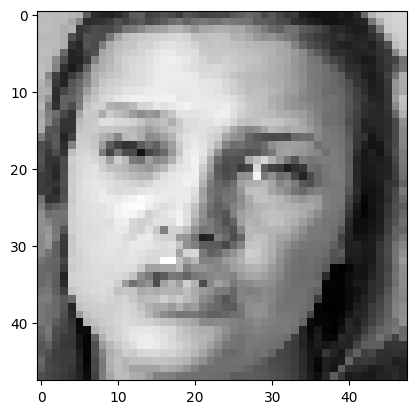

In [50]:
image = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/test/sad/054.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 [==============================] - 0s 101ms/step
model prediction is  happy


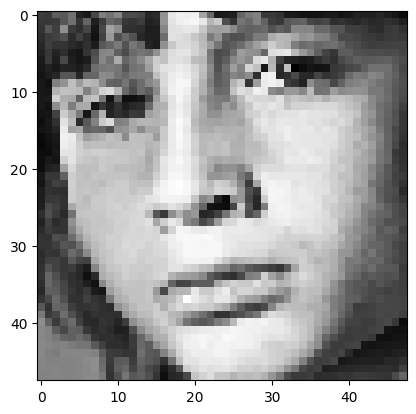

In [51]:
image = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/test/neutral/009.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 40ms/step
model prediction is  happy


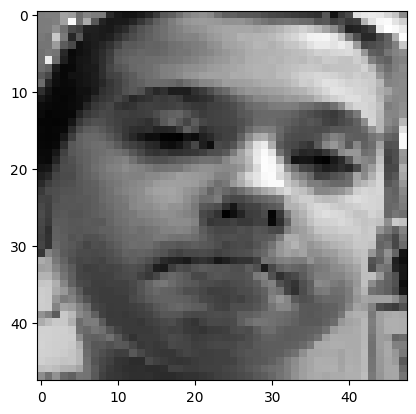

In [52]:
image = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/test/angry/033.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of suprised
1/1 [==============================] - 0s 34ms/step
model prediction is  happy


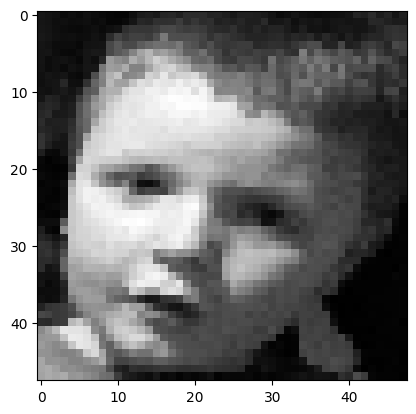

In [53]:
image = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/test/surprised/028.jpg'
print("original image is of suprised")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of suprised
1/1 [==============================] - 0s 67ms/step
model prediction is  happy


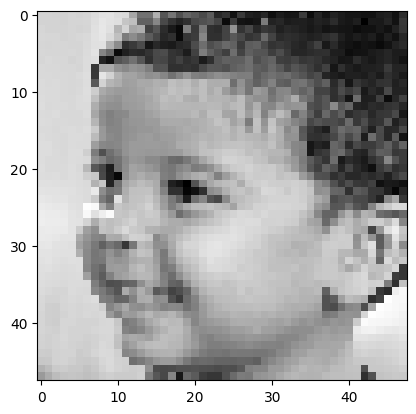

In [54]:
image = '/content/drive/MyDrive/autistic_emotion_recognition_dataset/test/happy/004.jpg'
print("original image is of suprised")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

## Получение метрик

In [ ]:
def predictor(test_gen, test_steps):
    y_pred= []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=test_gen.labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            errors=errors + 1
            file=test_gen.filenames[i]
        y_pred.append(pred_index)

    acc=( 1-errors/tests) * 100
    print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests
errors, tests=predictor(test_gen, test_steps)